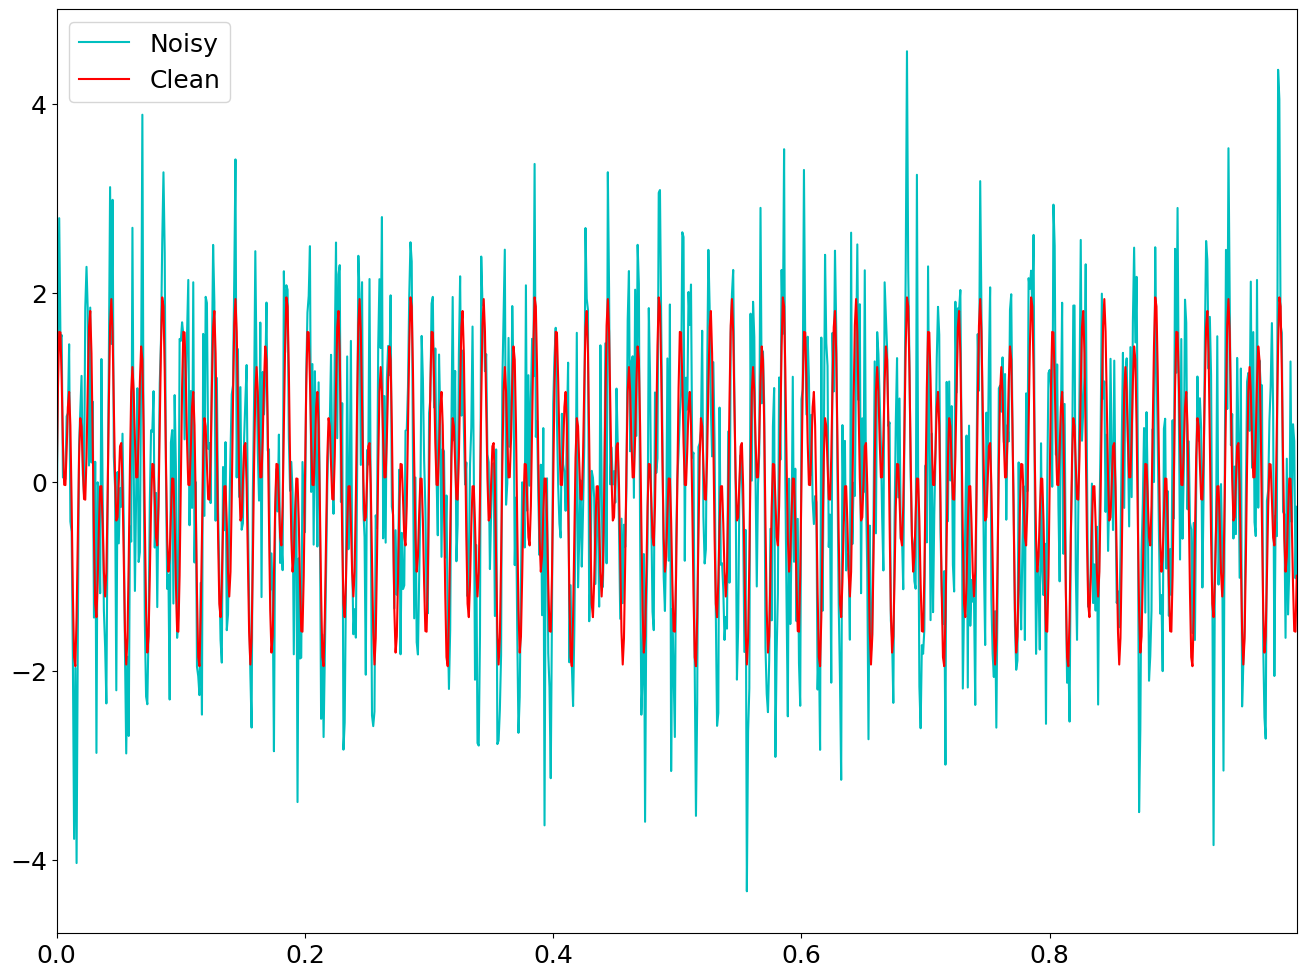

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 18})

## Membuat data signal
dt = 0.001
t = np.arange(0,1,dt)
f_clean = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) # signal bersih
f = f_clean + np.random.randn(len(t))                  # menambahkan noise

# plot signal bersih dan noisy
plt.plot(t, f, color='c', label='Noisy')
plt.plot(t, f_clean, color='r', label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()

f:\arya_env\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


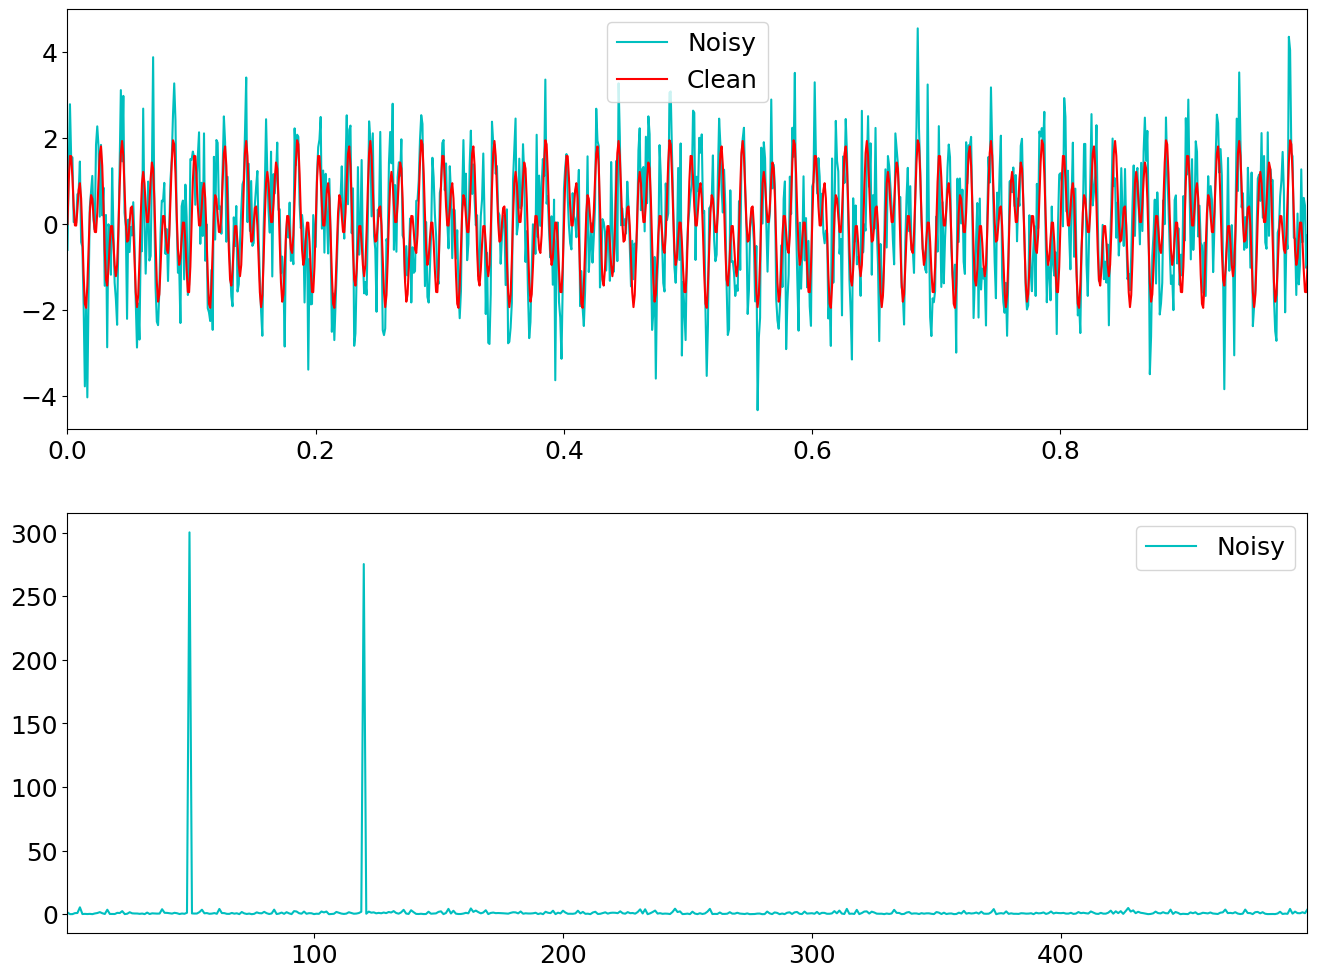

In [2]:
n = len(t)
fhat = np.fft.fft(f, n)                    # Hitung FFT
PSD = fhat * np.conj(fhat) / n             # Power spectrum (amplitude tiap frequencies)
freq = (1/(dt*n)) * np.arange(n)           # Membuat x-axis of frequencies
L = np.arange(1, np.floor(n/2), dtype=int) # Hanya plot sebagian dari keseluruhan frequencies

fig, axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t, f, color='c', label='Noisy')
plt.plot(t, f_clean, color='r', label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L], PSD[L], color='c', label='Noisy')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()

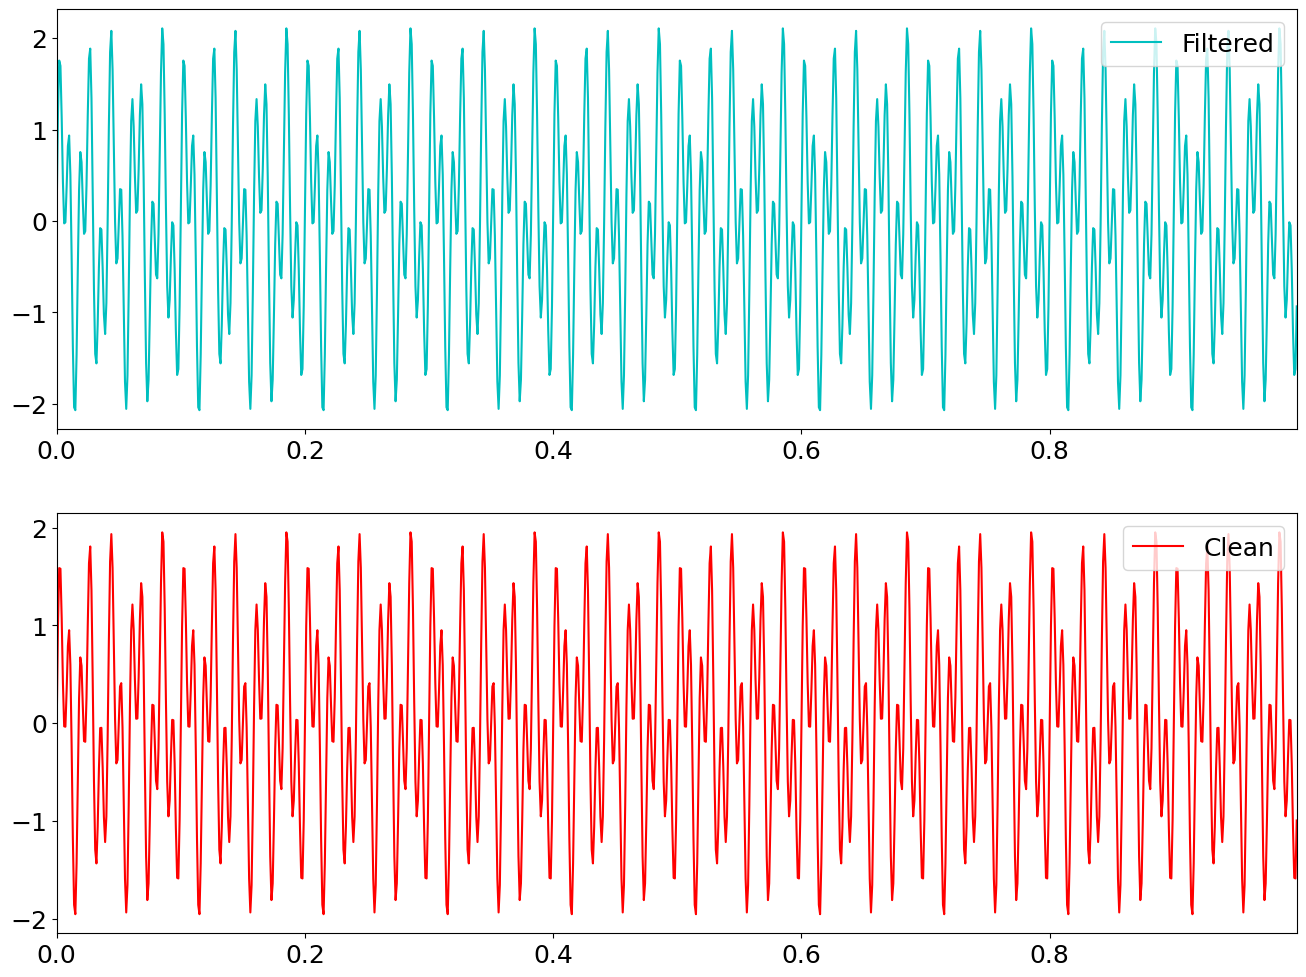

In [3]:
## Use the PSD to Filter out the noise
indices = PSD > 150       # Set Threshold
PSDclean = PSD * indices  # Menentukan PSD yang dominan
fhat = indices * fhat
ffilt = np.fft.ifft(fhat) # Inverse FFT

fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t, ffilt, color='c', label='Filtered')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t, f_clean, color='r', label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()